In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
##import Seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data= pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset

In [8]:
non_fraud= data[data["Class"]==0]
fraud= data[data["Class"]==1]

In [9]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [10]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [11]:
non_fraud= non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
non_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42501,41129.0,-0.661274,0.523350,2.779037,0.183632,-0.439517,0.154765,0.207162,0.022039,0.451216,...,0.001548,0.308592,-0.143097,0.430316,-0.292341,0.264210,-0.188530,-0.108427,10.00,0
194416,130573.0,0.014095,0.411354,0.145418,-1.079407,-0.060529,-1.034645,0.749573,-0.297365,-1.136255,...,0.001217,0.678576,-0.091527,-0.028839,-0.511025,-0.141762,0.478394,0.285637,33.63,0
97237,66123.0,-1.107361,-0.913138,2.120098,0.749917,0.236511,-0.280889,-0.850821,0.233059,-1.239495,...,-0.280036,-0.411946,0.052389,0.104947,0.115287,0.727110,0.067502,0.099849,28.75,0
47961,43435.0,1.035859,-1.150597,0.282650,-0.365814,-1.120440,-0.300292,-0.444797,-0.045414,-0.395916,...,0.099391,0.021726,-0.140868,0.109348,0.409372,-0.230799,-0.003434,0.037242,172.53,0
88282,62071.0,-0.317655,1.127318,0.593397,0.511937,0.673949,-0.638714,0.951063,-0.006381,-0.868410,...,0.017707,-0.049908,-0.251804,-0.112482,0.290164,-0.393297,0.025756,0.034083,22.56,0


In [13]:
data= non_fraud.append(fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41129.0,-0.661274,0.523350,2.779037,0.183632,-0.439517,0.154765,0.207162,0.022039,0.451216,...,0.001548,0.308592,-0.143097,0.430316,-0.292341,0.264210,-0.188530,-0.108427,10.00,0
1,130573.0,0.014095,0.411354,0.145418,-1.079407,-0.060529,-1.034645,0.749573,-0.297365,-1.136255,...,0.001217,0.678576,-0.091527,-0.028839,-0.511025,-0.141762,0.478394,0.285637,33.63,0
2,66123.0,-1.107361,-0.913138,2.120098,0.749917,0.236511,-0.280889,-0.850821,0.233059,-1.239495,...,-0.280036,-0.411946,0.052389,0.104947,0.115287,0.727110,0.067502,0.099849,28.75,0
3,43435.0,1.035859,-1.150597,0.282650,-0.365814,-1.120440,-0.300292,-0.444797,-0.045414,-0.395916,...,0.099391,0.021726,-0.140868,0.109348,0.409372,-0.230799,-0.003434,0.037242,172.53,0
4,62071.0,-0.317655,1.127318,0.593397,0.511937,0.673949,-0.638714,0.951063,-0.006381,-0.868410,...,0.017707,-0.049908,-0.251804,-0.112482,0.290164,-0.393297,0.025756,0.034083,22.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
x= data.drop("Class",axis=1)
y=data["Class"]

In [15]:
x_train, x_test, y_train, y_test=  train_test_split(x, y, test_size=0.2, random_state =0 , stratify=y)

In [16]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [17]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [18]:
y_train= y_train.to_numpy()
y_test= y_test.to_numpy()

In [19]:
x_train.shape

(787, 30)

In [20]:
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [21]:
x_train

array([[[ 1.24635637],
        [ 0.30470536],
        [ 0.06739553],
        ...,
        [-0.28935635],
        [-0.05308765],
        [-0.38742223]],

       [[ 0.95289966],
        [ 0.80891116],
        [-0.94122183],
        ...,
        [-0.03908432],
        [-0.16660905],
        [-0.29434156]],

       [[-1.43930304],
        [-2.11581197],
        [ 1.21917832],
        ...,
        [ 2.48749501],
        [-2.29205673],
        [-0.46050988]],

       ...,

       [[-1.56968229],
        [-0.39724997],
        [ 0.30771715],
        ...,
        [-1.35494745],
        [ 1.51723209],
        [-0.32192625]],

       [[-0.92411475],
        [ 0.37277886],
        [-0.38559982],
        ...,
        [-0.27660327],
        [-0.78797556],
        [-0.15773837]],

       [[-0.20611889],
        [ 0.38719957],
        [-0.39636463],
        ...,
        [ 0.19684042],
        [ 0.48021863],
        [-0.41429962]]])

# Build CNN

In [22]:
epochs= 20
model= Sequential()
model.add(Conv1D(32, 2 , activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [24]:
model.compile(optimizer=Adam(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
history=model.fit(x_train, y_train, epochs= epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 92ms/step - loss: 1.1359 - accuracy: 0.5959 - val_loss: 0.6158 - val_accuracy: 0.8020
Epoch 2/20
25/25 [==============================] - 2s 97ms/step - loss: 0.7248 - accuracy: 0.7408 - val_loss: 0.5550 - val_accuracy: 0.8376
Epoch 3/20
25/25 [==============================] - 2s 86ms/step - loss: 0.5305 - accuracy: 0.7980 - val_loss: 0.5216 - val_accuracy: 0.8782
Epoch 4/20
25/25 [==============================] - 2s 88ms/step - loss: 0.4439 - accuracy: 0.8361 - val_loss: 0.4964 - val_accuracy: 0.9188
Epoch 5/20
25/25 [==============================] - 2s 79ms/step - loss: 0.3852 - accuracy: 0.8501 - val_loss: 0.4679 - val_accuracy: 0.9036
Epoch 6/20
25/25 [==============================] - 2s 90ms/step - loss: 0.4184 - accuracy: 0.8539 - val_loss: 0.4328 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 3s 106ms/step - loss: 0.3095 - accuracy: 0.8869 - val_loss: 0.4064 - val_accuracy: 0.9036
Epoch 8/20
2

In [26]:
def plot_learning_curve(history, epochs):
    epoch_range= range(1, epochs+1);
    plt.plot(epoch_range, history.history['accuracy'], history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'], history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()
    
    

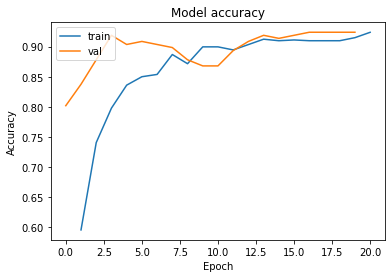

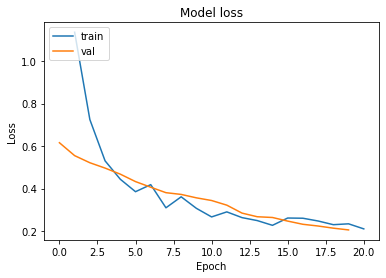

In [27]:
plot_learning_curve(history, epochs)

### Adding MaxPool

In [28]:
epochs= 20
model= Sequential()
model.add(Conv1D(32, 2 , activation='relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2 , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer=Adam(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
history=model.fit(x_train, y_train, epochs= epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 74ms/step - loss: 1.1300 - accuracy: 0.5527 - val_loss: 0.6547 - val_accuracy: 0.7056
Epoch 2/20
25/25 [==============================] - 1s 48ms/step - loss: 0.9559 - accuracy: 0.5858 - val_loss: 0.6259 - val_accuracy: 0.7563
Epoch 3/20
25/25 [==============================] - 2s 68ms/step - loss: 0.7004 - accuracy: 0.6811 - val_loss: 0.5998 - val_accuracy: 0.7259
Epoch 4/20
25/25 [==============================] - 2s 72ms/step - loss: 0.6654 - accuracy: 0.7179 - val_loss: 0.5719 - val_accuracy: 0.7259
Epoch 5/20
25/25 [==============================] - 2s 62ms/step - loss: 0.5700 - accuracy: 0.7382 - val_loss: 0.5438 - val_accuracy: 0.7310
Epoch 6/20
25/25 [==============================] - 2s 68ms/step - loss: 0.4901 - accuracy: 0.8056 - val_loss: 0.5147 - val_accuracy: 0.7563
Epoch 7/20
25/25 [==============================] - 2s 63ms/step - loss: 0.4484 - accuracy: 0.8043 - val_loss: 0.4875 - val_accuracy: 0.7614
Epoch 8/20
25

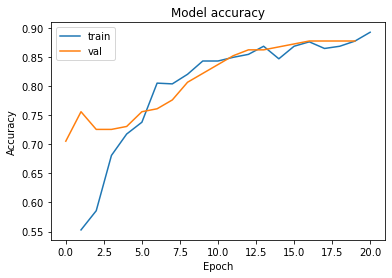

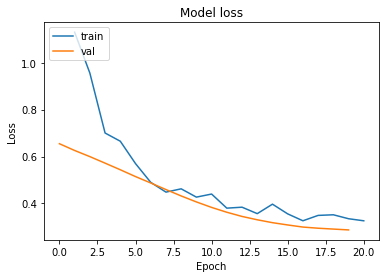

In [31]:
plot_learning_curve(history,epochs)